In [4]:
import h5py
filename = "test_2.h5"

file = h5py.File(filename, "r")

print(file.keys())
print(type(file['data']))
key_1 = list(file['data'])
print(key_1) 
key_2 = list(file['data']['NXdata'])
print(key_2) 
print(type(file['data']['NXdata']['data']))

<KeysViewHDF5 ['data']>
<class 'h5py._hl.group.Group'>
['NXdata', 'end_time', 'start_time', 'title']
['Channels', 'data', 'dim_0', 'dim_1']
<class 'h5py._hl.dataset.Dataset'>


In [5]:
NXdata = file['data']['NXdata']
spectrum = NXdata['data']
channels = NXdata['Channels']

In [6]:
print(spectrum.shape)
print(channels[()])

(15, 14, 1738)
[0.000e+00 1.000e+00 2.000e+00 ... 1.735e+03 1.736e+03 1.737e+03]


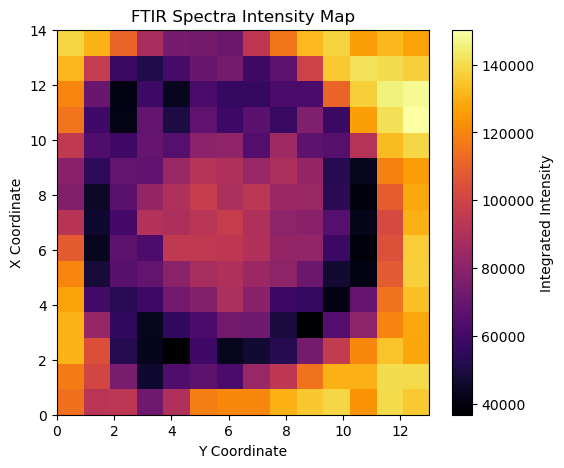

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the HDF5 file
with h5py.File(filename, "r") as h5_file:
    spectra_map = h5_file["data/NXdata/data"][:]  # Shape (15, 14, 1738)
    channels = h5_file["data/NXdata/Channels"][:]  # Wavenumbers
    dim_0 = h5_file["data/NXdata/dim_0"][:]  # X-coordinates
    dim_1 = h5_file["data/NXdata/dim_1"][:]  # Y-coordinates

# Compute an intensity map by summing over spectral dimension
intensity_map = np.sum(spectra_map, axis=2)

# Plot heatmap of the intensity map
plt.figure(figsize=(6, 5))
plt.imshow(intensity_map, cmap="inferno", aspect="auto", origin="lower", extent=[dim_1.min(), dim_1.max(), dim_0.min(), dim_0.max()])
plt.colorbar(label="Integrated Intensity")
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.title("FTIR Spectra Intensity Map")
plt.show()


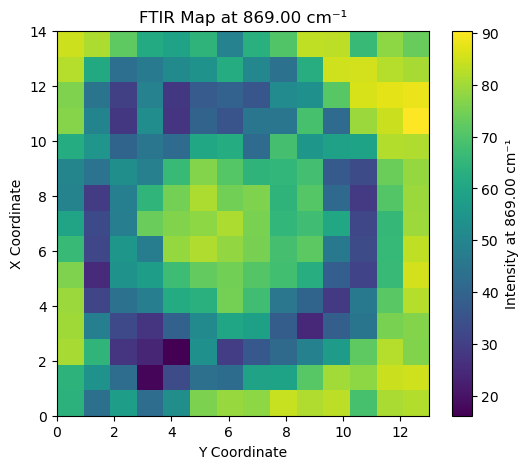

In [8]:
# Extract a specific wavenumber slice (e.g., mid-range of the spectral channels)
mid_index = len(channels) // 2
wavenumber_slice = spectra_map[:, :, mid_index]

# Plot the heatmap for a single wavenumber
plt.figure(figsize=(6, 5))
plt.imshow(wavenumber_slice, cmap="viridis", aspect="auto", origin="lower", extent=[dim_1.min(), dim_1.max(), dim_0.min(), dim_0.max()])
plt.colorbar(label=f"Intensity at {channels[mid_index]:.2f} cm⁻¹")
plt.xlabel("Y Coordinate")
plt.ylabel("X Coordinate")
plt.title(f"FTIR Map at {channels[mid_index]:.2f} cm⁻¹")
plt.show()


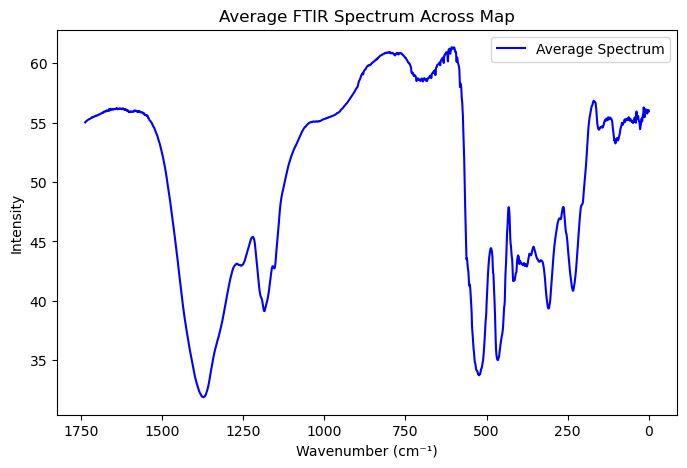

In [9]:
# Compute the average spectrum across all spatial points
average_spectrum = np.mean(spectra_map, axis=(0, 1))

# Plot the average spectrum
plt.figure(figsize=(8, 5))
plt.plot(channels, average_spectrum, label="Average Spectrum", color="b")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("Average FTIR Spectrum Across Map")
plt.gca().invert_xaxis()  # FTIR spectra are typically plotted with decreasing wavenumber
plt.legend()
plt.show()


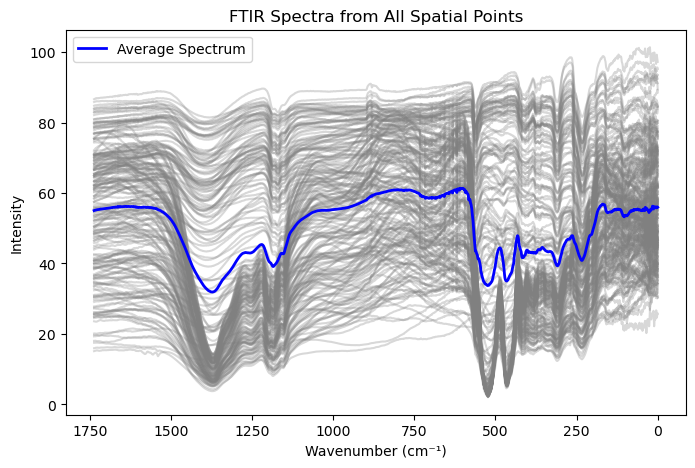

In [10]:
# Plot all spectra from the spatial grid
plt.figure(figsize=(8, 5))

for i in range(spectra_map.shape[0]):  # Loop over x-dimension
    for j in range(spectra_map.shape[1]):  # Loop over y-dimension
        plt.plot(channels, spectra_map[i, j, :], alpha=0.3, color="gray")

# Overlay the average spectrum for reference
plt.plot(channels, average_spectrum, color="b", label="Average Spectrum", linewidth=2)

plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("FTIR Spectra from All Spatial Points")
plt.gca().invert_xaxis()  # FTIR spectra are typically plotted with decreasing wavenumber
plt.legend()
plt.show()


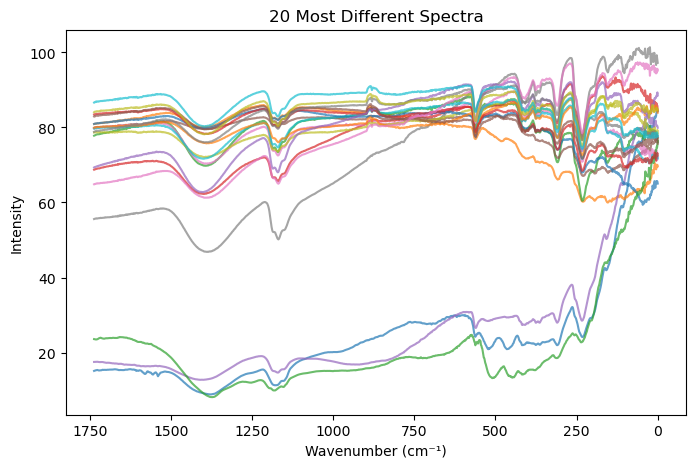

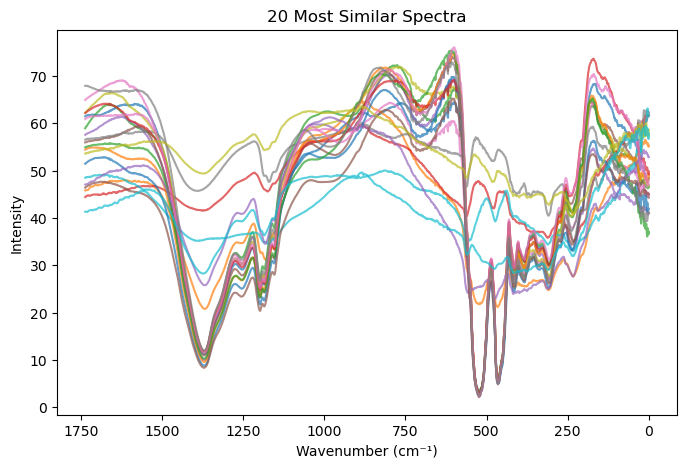

In [11]:
from scipy.spatial.distance import pdist, squareform

# Reshape spectra data for pairwise distance calculations
num_x, num_y, num_wavenumbers = spectra_map.shape
spectra_reshaped = spectra_map.reshape(num_x * num_y, num_wavenumbers)

# Compute pairwise Euclidean distances between all spectra
distance_matrix = squareform(pdist(spectra_reshaped, metric="euclidean"))

# Compute mean distances for each spectrum to all others
mean_distances = np.mean(distance_matrix, axis=1)

# Find indices of 20 most different and 20 most similar spectra
most_different_indices = np.argsort(mean_distances)[-20:]  # Highest distances
most_similar_indices = np.argsort(mean_distances)[:20]  # Lowest distances

# Extract corresponding spectra
most_different_spectra = spectra_reshaped[most_different_indices]
most_similar_spectra = spectra_reshaped[most_similar_indices]

# Plot the 20 most different spectra
plt.figure(figsize=(8, 5))
for spectrum in most_different_spectra:
    plt.plot(channels, spectrum, alpha=0.7)

plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("20 Most Different Spectra")
plt.gca().invert_xaxis()
plt.show()

# Plot the 20 most similar spectra
plt.figure(figsize=(8, 5))
for spectrum in most_similar_spectra:
    plt.plot(channels, spectrum, alpha=0.7)

plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Intensity")
plt.title("20 Most Similar Spectra")
plt.gca().invert_xaxis()
plt.show()
